<a href="https://colab.research.google.com/github/Puru-Gupta/Twitter_Disaster-Tweets/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Twitter_sentiment**

**Competition Description**
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

**What am I predicting?**<br>
You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

**What should I expect the data format to be?**<br>

Each sample in the **train and test set** has the following information:
The text of a tweet
A **keyword** from that tweet (although this may be blank!)
The **location** the tweet was sent from (may also be blank)

##**We'll be building the following:**<br>
**Model 1: Naive Bayes (baseline Model)**<br>
**Model 2: Feed-forward neural network (dense model)**<br>
**Model 3: LSTM model**<br>
**Model 3: GRU model**<br>
**Model 4: TensorFlow Hub Pretrained Feature Extractor** 

In [ ]:
#Fro Importing data from kaggle 
#Install the Kaggle first 
!pip install kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"purushottamgupta","key":"dbaa764b15959296b10e816f5c6905ce"}'}

In [2]:
#Now we rae going to craete kaggle directory
!mkdir ~/.kaggle

In [3]:
# Now se will copy the json file to folder that we have created
! cp kaggle.json ~/.kaggle/

In [4]:
#Now we need permision to get json file act
! chmod 600 ~/.kaggle4/kaggle.json


chmod: cannot access '/root/.kaggle4/kaggle.json': No such file or directory


In [5]:
##Kaggle API Command for getting Data directly from Kaggle
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 60.8MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 63.4MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.2MB/s]


In [7]:
import pandas as pd
import numpy as np

In [11]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
train_data.shape
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
import random
data_list = train_data["text"]
sample_data = random.choices(data_list, k=1)
print(sample_data)

['Heat wave in WB heavy losses and no compensations (report) -  http://t.co/wMDihdiz1r (via PalinfoEn)   #Palestine']


In [14]:
train_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [16]:
#Suffle data
suffle_tdata = train_data.sample(frac = 1, random_state=42)
suffle_tdata.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [17]:
import random
random_index = random.randint(0, len(suffle_tdata)-5)
for row in suffle_tdata[["text", "target"]][random_index:random_index+1].itertuples():
  _, review, sentiment = row
  print(suffle_tdata['text'])
  print("\n")
  print(suffle_tdata['target'])
  print("---\n")

2644    So you have a new weapon that can cause un-ima...
2227    The f$&amp;@ing things I do for #GISHWHES Just...
5448    DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...
132     Aftershock back to school kick off was great. ...
6845    in response to trauma Children of Addicts deve...
                              ...                        
5226    @Eganator2000 There aren't many Obliteration s...
5390    just had a panic attack bc I don't have enough...
860     Omron HEM-712C Automatic Blood Pressure Monito...
7603    Officials say a quarantine is in place at an A...
7270    I moved to England five years ago today. What ...
Name: text, Length: 7613, dtype: object


2644    1
2227    0
5448    1
132     0
6845    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 7613, dtype: int64
---



In [18]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(suffle_tdata["text"].to_numpy(),
                                                                            suffle_tdata["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [20]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [21]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [22]:
train_sentences 

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [23]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [24]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [31]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 30 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace', ngrams=None, 
                                    output_mode='int',
                                    pad_to_max_tokens=False,
                                    output_sequence_length=max_length)
            

In [32]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [33]:
#Example creating sample sequence and tokenize
sample_sen= " i love tesnorflow and its libraries"
text_vectorizer(sample_sen)

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([  8, 110,   1,   7,  37,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0])>

In [34]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Naaa I bee dead.. Like a legit zombie .. I feel every sore part in my body ?? https://t.co/J4fSDPfA63      

Vectorized version:


<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[   1,    8, 4104,  115,   25,    3, 2902, 1913,    8,  214,  197,
        4570,  453,    4,   13,   83,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])>

In [29]:
count = []
for x in range(len(suffle_tdata)):
  lenght_words = len(suffle_tdata['text'][x])
  count.append(lenght_words)


(array([6.12986558e-04, 1.75139017e-04, 5.25417050e-04, 3.50278033e-04,
        7.00556066e-04, 2.62708525e-04, 1.22597312e-03, 1.22597312e-03,
        1.75139017e-03, 6.12986558e-04, 2.10166820e-03, 1.05083410e-03,
        3.59034984e-03, 1.66382066e-03, 2.62708525e-03, 9.63264591e-04,
        3.67791935e-03, 2.53951574e-03, 5.77958755e-03, 1.92652918e-03,
        3.76548886e-03, 2.27680722e-03, 4.20333640e-03, 1.75139017e-03,
        6.48014361e-03, 2.88979377e-03, 6.39257411e-03, 2.62708525e-03,
        5.69201804e-03, 2.88979377e-03, 6.12986558e-03, 2.71465476e-03,
        5.95472656e-03, 2.36437672e-03, 6.21743509e-03, 3.50278033e-03,
        6.91799116e-03, 3.94062787e-03, 6.91799116e-03, 3.59034984e-03,
        8.40667280e-03, 4.20333640e-03, 7.26826919e-03, 3.85305837e-03,
        8.40667280e-03, 3.85305837e-03, 9.89535444e-03, 5.51687902e-03,
        1.19094531e-02, 4.90389246e-03, 1.03332020e-02, 4.90389246e-03,
        1.05959105e-02, 6.74285214e-03, 1.15591751e-02, 4.816322

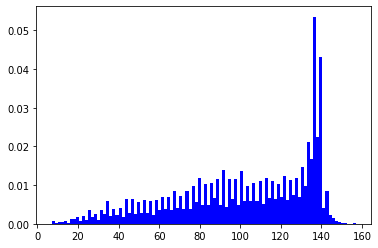

In [30]:
import matplotlib.pyplot as plt
plt.hist(count, bins = 100,
         density=True, 
         histtype='bar', 
         color='b', label=None,)

In [35]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [36]:
 #Getting a baseline Naive Bayes (baseline)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_base = Pipeline([
                       ('tfidf', TfidfVectorizer()),
                       ("clf", MultinomialNB())
                        
])

# Fit the pipeline to the training data
model_base.fit(train_sentences, train_labels)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [37]:
baseline_score = model_base.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [38]:
baseline_pred = model_base.predict(val_sentences)

In [ ]:
 #Evaluation function for our model experiments

In [39]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def model_accuracy_metrics(label_true, label_preds):
  model_accuracy = accuracy_score(label_true,label_preds)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(label_true, label_preds, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results                  

In [40]:
model_1_results = model_accuracy_metrics(val_labels,
                                    baseline_pred) 
model_1_results

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
#Model number 2
#LSTM_RNN

In [41]:
tf.random.set_seed(42)
model2_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

#Now LSTM model
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model2_embedding(x)
x = tf.keras.layers.LSTM(128)(x)
#x = tf.keras.layers.LSTM(64)(x)
x= tf.keras.layers.Dense(64, activation='relu')(x)
x= tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, output, name="model_2_LSTM")

#Model compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#lr_schedular = tf.keras.callbacks.LearningRateScheduler((lambda epoch: 1e-3 * 10**(epoch/20))

history_1 = model_2.fit(train_sentences, 
                        train_labels, 
                        epochs=3, 
                        batch_size=256,
                        validation_data = (val_sentences, val_labels))



Epoch 1/3
27/27 [==============================] - 9s 242ms/step - loss: 0.6811 - accuracy: 0.5707 - val_loss: 0.6351 - val_accuracy: 0.5433
Epoch 2/3
27/27 [==============================] - 6s 212ms/step - loss: 0.4898 - accuracy: 0.7759 - val_loss: 0.4658 - val_accuracy: 0.7822
Epoch 3/3
27/27 [==============================] - 6s 213ms/step - loss: 0.2986 - accuracy: 0.8856 - val_loss: 0.4895 - val_accuracy: 0.7730


In [42]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 30)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 30, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [43]:

# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)

In [44]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [45]:
# Calculate LSTM model results
model_2_results = model_accuracy_metrics(val_labels,
                                    model_2_preds) 
model_2_results

{'accuracy': 0.7729658792650919,
 'f1': 0.7712160418848196,
 'precision': 0.7740517401498704,
 'recall': 0.7729658792650919}

In [46]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64, return_sequences=True)(x) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels)
                             )               

Epoch 1/5
215/215 [==============================] - 17s 60ms/step - loss: 0.6740 - accuracy: 0.5859 - val_loss: 0.5391 - val_accuracy: 0.7428
Epoch 2/5
215/215 [==============================] - 12s 56ms/step - loss: 0.4294 - accuracy: 0.8187 - val_loss: 0.4639 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 12s 56ms/step - loss: 0.2819 - accuracy: 0.8913 - val_loss: 0.4798 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 12s 56ms/step - loss: 0.1915 - accuracy: 0.9313 - val_loss: 0.5958 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 12s 57ms/step - loss: 0.1219 - accuracy: 0.9558 - val_loss: 0.7576 - val_accuracy: 0.7690


In [47]:
#Make predictions on the validation dataset
model_3_pred_probs = model_3.predict(val_sentences)

In [48]:
#Round out predictions and reduce to 1-dimensional array
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [49]:
# Calculate LSTM model results
model_3_results = model_accuracy_metrics(val_labels,
                                    model_3_preds)
model_3_results

{'accuracy': 0.7690288713910761,
 'f1': 0.768063295978387,
 'precision': 0.7689137548517897,
 'recall': 0.7690288713910761}

In [ ]:
#TensorFlow Hub Pretrained Sentence Encoder

In [50]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder

In [51]:
# Each sentence has been encoded into a 512 dimension vector
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [54]:
# Create model using the Sequential API
model_4 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_4_USE")

# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

 
# Train a classifier on top of pretrained embeddings
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=20,
                              validation_data=(val_sentences, val_labels),
                              )               



Epoch 1/20
215/215 [==============================] - 4s 14ms/step - loss: 0.5064 - accuracy: 0.7859 - val_loss: 0.4519 - val_accuracy: 0.7966
Epoch 2/20
215/215 [==============================] - 3s 12ms/step - loss: 0.4160 - accuracy: 0.8139 - val_loss: 0.4400 - val_accuracy: 0.8084
Epoch 3/20
215/215 [==============================] - 3s 12ms/step - loss: 0.4015 - accuracy: 0.8202 - val_loss: 0.4353 - val_accuracy: 0.8163
Epoch 4/20
215/215 [==============================] - 3s 12ms/step - loss: 0.3944 - accuracy: 0.8260 - val_loss: 0.4301 - val_accuracy: 0.8136
Epoch 5/20
215/215 [==============================] - 3s 12ms/step - loss: 0.3883 - accuracy: 0.8286 - val_loss: 0.4312 - val_accuracy: 0.8150
Epoch 6/20
215/215 [==============================] - 3s 12ms/step - loss: 0.3815 - accuracy: 0.8324 - val_loss: 0.4260 - val_accuracy: 0.8163
Epoch 7/20
215/215 [==============================] - 2s 12ms/step - loss: 0.3755 - accuracy: 0.8340 - val_loss: 0.4251 - val_accuracy: 0.8150

In [55]:
model_4.summary()

Model: "model_4_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [56]:
#Make predictions on the validation dataset
model_4_pred_probs = model_4.predict(val_sentences)

In [57]:
#Round out predictions and reduce to 1-dimensional array
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [58]:
# Calculate LSTM model results
model_4_results = model_accuracy_metrics(val_labels,
                                    model_4_preds) 
model_4_results

{'accuracy': 0.8202099737532809,
 'f1': 0.8182082619710419,
 'precision': 0.8244564591477385,
 'recall': 0.8202099737532809}

In [ ]:

# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "Transfer_Learning": model_4_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.8632,0.863690,0.8632,0.863139
lstm,0.6588,0.742770,0.6588,0.627331
gru,0.8838,0.883800,0.8838,0.883800
Transfer_Learning,0.8652,0.866743,0.8652,0.865083
